In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib


# Is there a difference in crime activity between two different quarter seasons for the year 2020? Also, which parks had the highest number of crimes for each quarter?

In [2]:
df1 = pd.read_csv('https://raw.githubusercontent.com/Acarino19/DATA-201/main/nyc-park-crime-stats-q1-2020a.csv')
df1.head(5)

,1st QTRPARK CRIME REPORT,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,SEVEN MAJOR COMPLAINTS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Report covering the period Between Jan 1, 202...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,PARK,BOROUGH,SIZE (ACRES),CATEGORY,MURDER,RAPE,ROBBERY,FELONY ASSAULT,BURGLARY,GRAND LARCENY,GRAND LARCENY OF MOTOR VEHICLE,TOTAL
3,PELHAM BAY PARK,BRONX,2771.75,ONE ACRE OR LARGER,0,0,0,0,0,0,0,0
4,VAN CORTLANDT PARK,BRONX,1146.43,ONE ACRE OR LARGER,0,0,0,0,0,0,0,0


In [3]:
df2= df1.dropna()

In [4]:
#Keep certain columns
df3= df2[['1st QTRPARK CRIME REPORT', 'Unnamed: 1', 'Unnamed: 11']]

In [5]:
df3.head()

,1st QTRPARK CRIME REPORT,Unnamed: 1,Unnamed: 11
2,PARK,BOROUGH,TOTAL
3,PELHAM BAY PARK,BRONX,0
4,VAN CORTLANDT PARK,BRONX,0
5,ROCKAWAY BEACH AND BOARDWALK,QUEENS,0
6,FRESHKILLS PARK,STATEN ISLAND,0


In [6]:
#rename columns
df4= df3.rename(columns={"1st QTRPARK CRIME REPORT": "PARK", "Unnamed: 1": "BOROUGH", "Unnamed: 11": "TOTAL PARK CRIMES"})

In [7]:
df4.head()

,PARK,BOROUGH,TOTAL PARK CRIMES
2,PARK,BOROUGH,TOTAL
3,PELHAM BAY PARK,BRONX,0
4,VAN CORTLANDT PARK,BRONX,0
5,ROCKAWAY BEACH AND BOARDWALK,QUEENS,0
6,FRESHKILLS PARK,STATEN ISLAND,0


In [8]:
#reset index for consistency
dfn = df4.reset_index(drop=True)
dfn.head()

,PARK,BOROUGH,TOTAL PARK CRIMES
0,PARK,BOROUGH,TOTAL
1,PELHAM BAY PARK,BRONX,0
2,VAN CORTLANDT PARK,BRONX,0
3,ROCKAWAY BEACH AND BOARDWALK,QUEENS,0
4,FRESHKILLS PARK,STATEN ISLAND,0


In [51]:
#drop extra unneeded row from dataset
dfn0 = pd.DataFrame(dfn, columns= ['PARK'])
dfn0 = dfn.drop([0])
dfn0.head()

,PARK,BOROUGH,TOTAL PARK CRIMES
1,PELHAM BAY PARK,BRONX,0
2,VAN CORTLANDT PARK,BRONX,0
3,ROCKAWAY BEACH AND BOARDWALK,QUEENS,0
4,FRESHKILLS PARK,STATEN ISLAND,0
5,FLUSHING MEADOWS CORONA PARK,QUEENS,8


In [50]:
dfn0.head(10)

,PARK,BOROUGH,TOTAL PARK CRIMES
5,FLUSHING MEADOWS CORONA PARK,QUEENS,8
7,MARINE PARK,BROOKLYN,1
9,BRONX PARK,BRONX,3
11,ALLEY POND PARK,QUEENS,1
16,CONEY ISLAND BEACH & BOARDWALK,BROOKLYN,1
17,CUNNINGHAM PARK,QUEENS,2
25,KISSENA PARK,QUEENS,1
26,RIVERSIDE PARK,MANHATTAN,2
34,SOUNDVIEW PARK,BRONX,4
38,CLOVE LAKES PARK,STATEN ISLAND,2


In [48]:
#group by borough to see total values so far
dfn0.groupby(['BOROUGH'])['TOTAL PARK CRIMES'].count().sort_values(ascending=False)

BOROUGH
MANHATTAN          25
BRONX              21
QUEENS             19
BROOKLYN           19
STATEN ISLAND       2
BROOKLYN/QUEENS     1
Name: TOTAL PARK CRIMES, dtype: int64

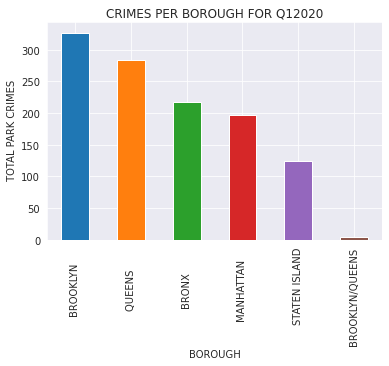

In [52]:
#Create bar graph to visualize current data
dfn0['BOROUGH'].value_counts().plot(kind='bar', title="CRIMES PER BOROUGH FOR Q12020", xlabel= 'BOROUGH', ylabel= ' TOTAL PARK CRIMES', color=['tab:blue','tab:orange', 'tab:green', 'tab:red', 'tab:purple','tab:brown'])
sns.set_style("darkgrid")

The above graph is not accurate as it takes into account every park even with a 0 value of park crime. 

In [13]:
# I had to remove all 0 values


In [14]:
#dfn0.drop(dfn0.index[dfn0['TOTAL PARK CRIMES'] == 0], inplace=True)


For some reason the above code wasnt working as there were string and integer values in the Total park crimes columns, so I converted the values to all integers,

In [57]:
dfn0['TOTAL PARK CRIMES'] = pd.to_numeric(dfn0['TOTAL PARK CRIMES'], errors = 'coerce')

In [58]:
#Drop rows where there were 0 crimes comitted for that specific park
dfn0.drop(dfn0.index[dfn0['TOTAL PARK CRIMES'] <1 ], inplace=True)
dfn0.head()

,PARK,BOROUGH,TOTAL PARK CRIMES
5,FLUSHING MEADOWS CORONA PARK,QUEENS,8
7,MARINE PARK,BROOKLYN,1
9,BRONX PARK,BRONX,3
11,ALLEY POND PARK,QUEENS,1
16,CONEY ISLAND BEACH & BOARDWALK,BROOKLYN,1


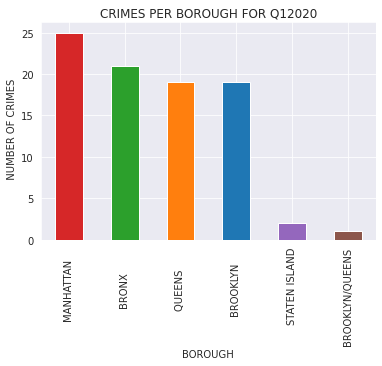

In [62]:
#Created bar graph with a more accurate number of crimes. Only counts of crimes comitted.
dfn0['BOROUGH'].value_counts().plot(kind='bar', title="CRIMES PER BOROUGH FOR Q12020", xlabel= 'BOROUGH', ylabel= '  NUMBER OF CRIMES', color=['tab:red','tab:green', 'tab:orange', 'tab:blue', 'tab:purple','tab:brown'])
sns.set_style("darkgrid")

**The above graph now shows all non zero values and number of crimes but NOT total number of crimes for each park.**

In [18]:
dfn0.groupby(['BOROUGH'])['TOTAL PARK CRIMES'].count().sort_values(ascending=False)

BOROUGH
MANHATTAN          25
BRONX              21
QUEENS             19
BROOKLYN           19
STATEN ISLAND       2
BROOKLYN/QUEENS     1
Name: TOTAL PARK CRIMES, dtype: int64

In [19]:
dfn1= dfn0.reset_index(drop=True)
dfn1.head(15)

,PARK,BOROUGH,TOTAL PARK CRIMES
0,FLUSHING MEADOWS CORONA PARK,QUEENS,8
1,MARINE PARK,BROOKLYN,1
2,BRONX PARK,BRONX,3
3,ALLEY POND PARK,QUEENS,1
4,CONEY ISLAND BEACH & BOARDWALK,BROOKLYN,1
5,CUNNINGHAM PARK,QUEENS,2
6,KISSENA PARK,QUEENS,1
7,RIVERSIDE PARK,MANHATTAN,2
8,SOUNDVIEW PARK,BRONX,4
9,CLOVE LAKES PARK,STATEN ISLAND,2


**TOP 10 PARKS THAT HAD THE MOST CRIME FOR Q1 2020**

In [20]:
dfn1.sort_values(["TOTAL PARK CRIMES"], ascending=False)
dfn1.head(10)

,PARK,BOROUGH,TOTAL PARK CRIMES
0,FLUSHING MEADOWS CORONA PARK,QUEENS,8
1,MARINE PARK,BROOKLYN,1
2,BRONX PARK,BRONX,3
3,ALLEY POND PARK,QUEENS,1
4,CONEY ISLAND BEACH & BOARDWALK,BROOKLYN,1
5,CUNNINGHAM PARK,QUEENS,2
6,KISSENA PARK,QUEENS,1
7,RIVERSIDE PARK,MANHATTAN,2
8,SOUNDVIEW PARK,BRONX,4
9,CLOVE LAKES PARK,STATEN ISLAND,2



# DATA FOR Q3 2020



In [21]:
dfx = pd.read_csv('/content/drive/MyDrive/nyc-park-crime-stats-q3-2020.csv')
dfx.head(5)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,PARK,BOROUGH,SIZE (ACRES),CATEGORY,MURDER,RAPE,ROBBERY,FELONY ASSAULT,BURGLARY,GRAND LARCENY,GRAND LARCENY OF MOTOR VEHICLE,TOTAL
3,PELHAM BAY PARK,BRONX,2771.747,ONE ACRE OR LARGER,0,0,1,2,0,3,0,6
4,VAN CORTLANDT PARK,BRONX,1146.430,ONE ACRE OR LARGER,0,0,1,2,0,2,0,5


In [22]:
dfx2= dfx.dropna()

In [23]:
dfx3= dfx2[['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 11']]

In [24]:
dfx4= dfx3.rename(columns={"Unnamed: 0": "PARK", "Unnamed: 1": "BOROUGH", "Unnamed: 11": "TOTAL PARK CRIMES"})

In [25]:
dfx4.head(3)

,PARK,BOROUGH,TOTAL PARK CRIMES
2,PARK,BOROUGH,TOTAL
3,PELHAM BAY PARK,BRONX,6
4,VAN CORTLANDT PARK,BRONX,5


In [26]:
dfx5 = pd.DataFrame(dfx4, columns= ['PARK'])
dfx5 = dfx4.drop([2])
dfx5.head(3)

,PARK,BOROUGH,TOTAL PARK CRIMES
3,PELHAM BAY PARK,BRONX,6
4,VAN CORTLANDT PARK,BRONX,5
5,ROCKAWAY BEACH AND BOARDWALK,QUEENS,6


In [27]:
dfx6 = dfx5.reset_index(drop=True)
dfx6.head(3)

,PARK,BOROUGH,TOTAL PARK CRIMES
0,PELHAM BAY PARK,BRONX,6
1,VAN CORTLANDT PARK,BRONX,5
2,ROCKAWAY BEACH AND BOARDWALK,QUEENS,6


In [28]:
dfx6['TOTAL PARK CRIMES'] = pd.to_numeric(dfx6['TOTAL PARK CRIMES'], errors = 'coerce')

In [29]:
dfx6.drop(dfx6.index[dfx6['TOTAL PARK CRIMES'] <1 ], inplace=True)
dfx6.head(3)

,PARK,BOROUGH,TOTAL PARK CRIMES
0,PELHAM BAY PARK,BRONX,6
1,VAN CORTLANDT PARK,BRONX,5
2,ROCKAWAY BEACH AND BOARDWALK,QUEENS,6


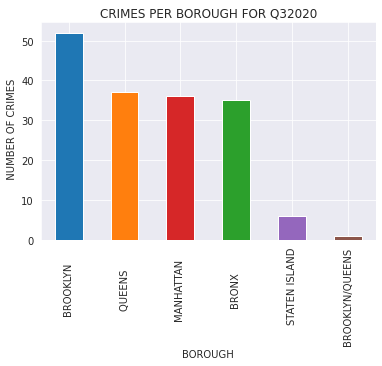

In [64]:
#barchart shows higher number of crimes for Q3 compared to Q1
dfx6['BOROUGH'].value_counts().plot(kind='bar', title="CRIMES PER BOROUGH FOR Q32020", xlabel= 'BOROUGH', ylabel= '  NUMBER OF CRIMES', color=['tab:blue','tab:orange', 'tab:red', 'tab:green', 'tab:purple', 'tab:brown'])
sns.set_style("darkgrid")

**Top 10 parks that had the highes number of crimes for Q3 2020.**

In [31]:
dfx6= dfx6.sort_values(["TOTAL PARK CRIMES"], ascending=False)
dfx6.head(10)

,PARK,BOROUGH,TOTAL PARK CRIMES
198,WASHINGTON SQUARE PARK,MANHATTAN,20
4,FLUSHING MEADOWS CORONA PARK,QUEENS,17
15,CONEY ISLAND BEACH & BOARDWALK,BROOKLYN,15
25,RIVERSIDE PARK,MANHATTAN,12
11,PROSPECT PARK,BROOKLYN,11
113,ST. MARY'S PARK BRONX,BRONX,11
8,BRONX PARK,BRONX,10
189,TOMPKINS SQUARE PARK,MANHATTAN,8
98,EAST RIVER PARK,MANHATTAN,7
253,UNION SQUARE PARK,MANHATTAN,7


**Final Comparison between Q1 and Q3 Quarters for the year 2020**

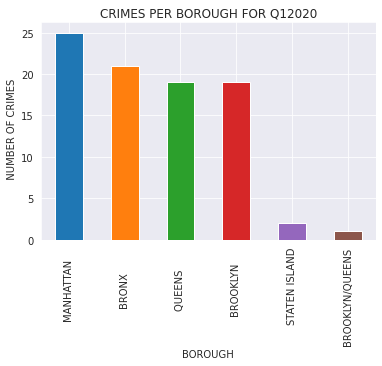

In [32]:
#Q1
dfn1['BOROUGH'].value_counts().plot(kind='bar', title="CRIMES PER BOROUGH FOR Q12020", xlabel= 'BOROUGH', ylabel= '  NUMBER OF CRIMES', color=['tab:blue','tab:orange', 'tab:green', 'tab:red', 'tab:purple','tab:brown'])
sns.set_style("whitegrid")

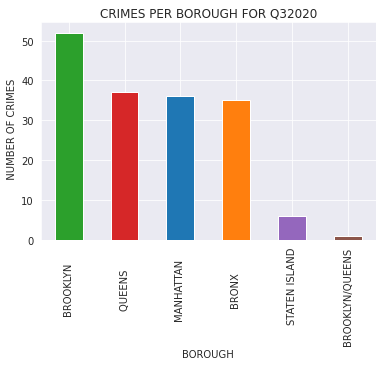

In [47]:
#Q3
dfx6['BOROUGH'].value_counts().plot(kind='bar', title="CRIMES PER BOROUGH FOR Q32020", xlabel= 'BOROUGH', ylabel= '  NUMBER OF CRIMES', color=['tab:green','tab:red', 'tab:blue', 'tab:orange', 'tab:purple', 'tab:brown'])
sns.set_style("whitegrid")

In [35]:
#dfn3.plot.bar(x = 'BOROUGH', y = 'TOTAL PARK CRIMES', color=['red', 'green', 'blue', 'brown'])

# Merged datasets

In [37]:
#Merged data frames to see what i can work with
dfr = pd.merge(dfx6, dfn1, on = 'PARK')
dfr.head(10)

,PARK,BOROUGH_x,TOTAL PARK CRIMES_x,BOROUGH_y,TOTAL PARK CRIMES_y
0,WASHINGTON SQUARE PARK,MANHATTAN,20,MANHATTAN,3
1,FLUSHING MEADOWS CORONA PARK,QUEENS,17,QUEENS,8
2,CONEY ISLAND BEACH & BOARDWALK,BROOKLYN,15,BROOKLYN,1
3,RIVERSIDE PARK,MANHATTAN,12,MANHATTAN,2
4,ST. MARY'S PARK BRONX,BRONX,11,BRONX,3
5,BRONX PARK,BRONX,10,BRONX,3
6,TOMPKINS SQUARE PARK,MANHATTAN,8,MANHATTAN,1
7,EAST RIVER PARK,MANHATTAN,7,MANHATTAN,2
8,UNION SQUARE PARK,MANHATTAN,7,MANHATTAN,3
9,SOUNDVIEW PARK,BRONX,6,BRONX,4


In [38]:
#rename columns

dfr2= dfr.rename(columns={"BOROUGH_x": "BOROUGH", "TOTAL PARK CRIMES_x": "PARK_CRIMESQ3", "BOROUGH_y": "BOROUGH_Q1", 'TOTAL PARK CRIMES_y': "PARK_CRIMESQ1"})
dfr2.head()

,PARK,BOROUGH,PARK_CRIMESQ3,BOROUGH_Q1,PARK_CRIMESQ1
0,WASHINGTON SQUARE PARK,MANHATTAN,20,MANHATTAN,3
1,FLUSHING MEADOWS CORONA PARK,QUEENS,17,QUEENS,8
2,CONEY ISLAND BEACH & BOARDWALK,BROOKLYN,15,BROOKLYN,1
3,RIVERSIDE PARK,MANHATTAN,12,MANHATTAN,2
4,ST. MARY'S PARK BRONX,BRONX,11,BRONX,3


In [39]:
dfr2.drop('BOROUGH_Q1', axis = 1, inplace = True)


In [40]:
dfr2['PARK_CRIMESQ1'] = pd.to_numeric(dfr2['PARK_CRIMESQ1'], errors = 'coerce')

In [41]:
#Final merged data set with Park crime numbers for both Quarters
dfr2.head(9)

,PARK,BOROUGH,PARK_CRIMESQ3,PARK_CRIMESQ1
0,WASHINGTON SQUARE PARK,MANHATTAN,20,3
1,FLUSHING MEADOWS CORONA PARK,QUEENS,17,8
2,CONEY ISLAND BEACH & BOARDWALK,BROOKLYN,15,1
3,RIVERSIDE PARK,MANHATTAN,12,2
4,ST. MARY'S PARK BRONX,BRONX,11,3
5,BRONX PARK,BRONX,10,3
6,TOMPKINS SQUARE PARK,MANHATTAN,8,1
7,EAST RIVER PARK,MANHATTAN,7,2
8,UNION SQUARE PARK,MANHATTAN,7,3


In [42]:
dfr2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43 entries, 0 to 42
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   PARK           43 non-null     object
 1   BOROUGH        43 non-null     object
 2   PARK_CRIMESQ3  43 non-null     int64 
 3   PARK_CRIMESQ1  43 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 1.7+ KB
